# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [25]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [26]:
import numpy as np
np.unique(y_train)
len(y_train)

34799

In [27]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation samples = ", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation samples =  4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

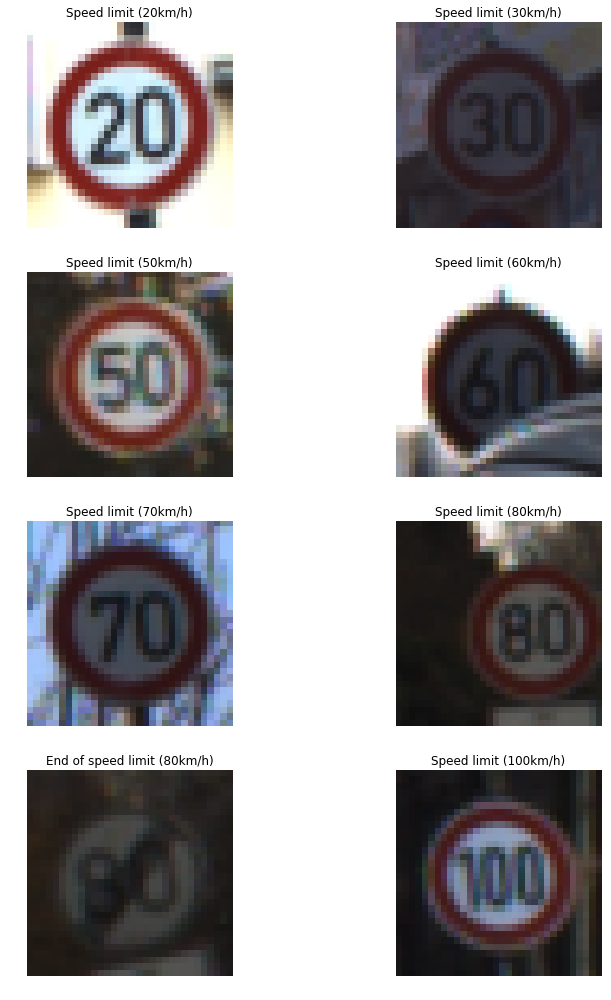

In [28]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline

# for i in range(n_classes):
#     print("Class:",i)
#     plt.imshow(X_train[np.argwhere(y_train==i)[20][0]])
#     plt.show()
    
    
def plot_figures(figures, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
           axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()
    
name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')
    
# number_to_stop = 8
# figures = {}
# labels = {}
# for i in range(number_to_stop):
#     index = random.randint(0, n_train-1)
#     labels[i] = name_values[y_train[index]][1].decode('ascii')
# #     print(name_values[y_train[index]][1].decode('ascii'))
#     figures[i] = X_train[index]
    
# plot_figures(figures, 4, 2, labels)


# Print out Signs corresponding to the class number.
figures = {}
labels = {}
for i in range(8):
    #print("Class:",name_values[i])
    #plt.imshow(X_train[np.argwhere(y_train==i)[20][0]])
    #plt.show()
    index = np.argwhere(y_train==i)[0]
    labels[i] = name_values[y_train[index]][0][1].decode('ascii')
    figures[i] = X_train[np.argwhere(y_train==i)[20][0]]
    
plot_figures(figures, 4, 2, labels)

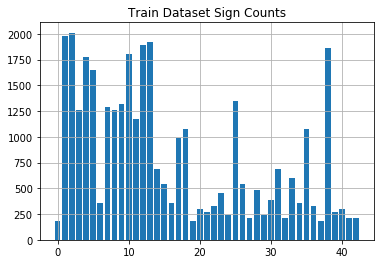

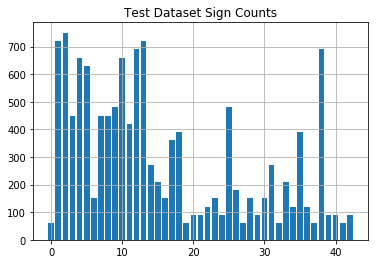

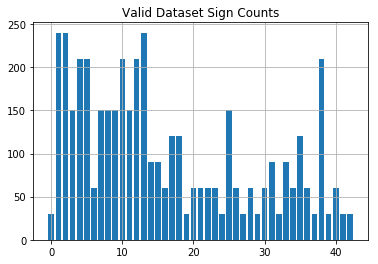

In [29]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
plt.bar(unique_train, counts_train)
plt.grid()
plt.title("Train Dataset Sign Counts")
plt.show()

unique_test, counts_test = np.unique(y_test, return_counts=True)
plt.bar(unique_test, counts_test)
plt.grid()
plt.title("Test Dataset Sign Counts")
plt.show()

unique_valid, counts_valid = np.unique(y_valid, return_counts=True)
plt.bar(unique_valid, counts_valid)
plt.grid()
plt.title("Valid Dataset Sign Counts")
plt.show()

In [22]:
import random

### Print out the number of each class from the train set
count_train = []
for i in range(n_classes):
    count = len(y_train[y_train==i])
    print("Number of Class", i, ":", count)
    count_train.append(count)

Number of Class 0 : 180
Number of Class 1 : 1980
Number of Class 2 : 2010
Number of Class 3 : 1260
Number of Class 4 : 1770
Number of Class 5 : 1650
Number of Class 6 : 360
Number of Class 7 : 1290
Number of Class 8 : 1260
Number of Class 9 : 1320
Number of Class 10 : 1800
Number of Class 11 : 1170
Number of Class 12 : 1890
Number of Class 13 : 1920
Number of Class 14 : 690
Number of Class 15 : 540
Number of Class 16 : 360
Number of Class 17 : 990
Number of Class 18 : 1080
Number of Class 19 : 180
Number of Class 20 : 300
Number of Class 21 : 270
Number of Class 22 : 330
Number of Class 23 : 450
Number of Class 24 : 240
Number of Class 25 : 1350
Number of Class 26 : 540
Number of Class 27 : 210
Number of Class 28 : 480
Number of Class 29 : 240
Number of Class 30 : 390
Number of Class 31 : 690
Number of Class 32 : 210
Number of Class 33 : 599
Number of Class 34 : 360
Number of Class 35 : 1080
Number of Class 36 : 330
Number of Class 37 : 180
Number of Class 38 : 1860
Number of Class 39 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

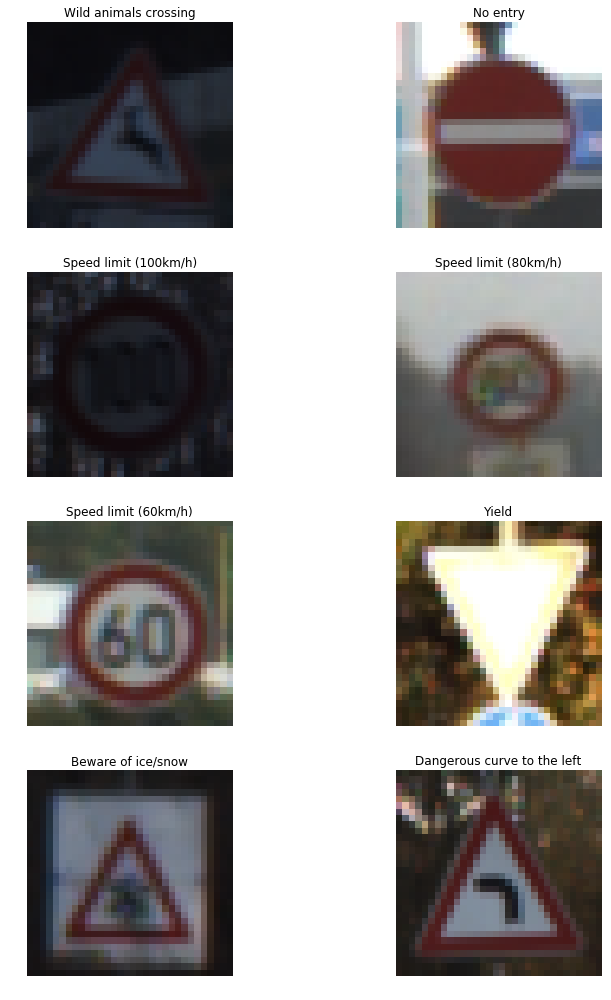

In [23]:
image_depth_channels = X_train.shape[3]

# print(image_depth_channels)

number_to_stop = 8
figures = {}
random_signs = []
for i in range(number_to_stop):
    index = random.randint(0, n_train-1)
    labels[i] = name_values[y_train[index]][1].decode('ascii')
    figures[i] = X_train[index].squeeze()
    random_signs.append(index)
    
# print(random_signs)
plot_figures(figures, 4, 2, labels)

In [30]:
import cv2

more_X_train = []
more_y_train = []

more2_X_train = []
more2_y_train = []

new_counts_train = counts_train
for i in range(n_train):
    if(new_counts_train[y_train[i]] < 3000):
        for j in range(3):
            dx, dy = np.random.randint(-1.7, 1.8, 2)
            M = np.float32([[1, 0, dx], [0, 1, dy]])
            dst = cv2.warpAffine(X_train[i], M, (X_train[i].shape[0], X_train[i].shape[1]))
            dst = dst[:,:,None]
            more_X_train.append(dst)
            more_y_train.append(y_train[i])

            random_higher_bound = random.randint(27, 32)
            random_lower_bound = random.randint(0, 5)
            points_one = np.float32([[0,0],[32,0],[0,32],[32,32]])
            points_two = np.float32([[0, 0], [random_higher_bound, random_lower_bound], [random_lower_bound, 32],[32, random_higher_bound]])
            M = cv2.getPerspectiveTransform(points_one, points_two)
            dst = cv2.warpPerspective(X_train[i], M, (32,32))
            more2_X_train.append(dst)
            more2_y_train.append(y_train[i])
            
            tilt = random.randint(-12, 12)
            M = cv2.getRotationMatrix2D((X_train[i].shape[0]/2, X_train[i].shape[1]/2), tilt, 1)
            dst = cv2.warpAffine(X_train[i], M, (X_train[i].shape[0], X_train[i].shape[1]))
            more2_X_train.append(dst)
            more2_y_train.append(y_train[i])
            
            new_counts_train[y_train[i]] += 2
    
more_X_train = np.array(more_X_train)
more_y_train = np.array(more_y_train)
X_train = np.concatenate((X_train, more_X_train), axis=0)
y_train = np.concatenate((y_train, more_y_train), axis=0)

more2_X_train = np.array(more_X_train)
more2_y_train = np.array(more_y_train)
more2_X_train = np.reshape(more2_X_train, (np.shape(more2_X_train)[0], 32, 32, 1))
X_train = np.concatenate((X_train, more2_X_train), axis=0)
y_train = np.concatenate((y_train, more2_y_train), axis=0)

X_train = np.concatenate((X_train, X_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

ValueError: all the input arrays must have same number of dimensions

In [33]:
X_train.shape

(34799, 32, 32, 3)

In [35]:
more_X_train.shape

(36558, 32, 32, 1, 3)

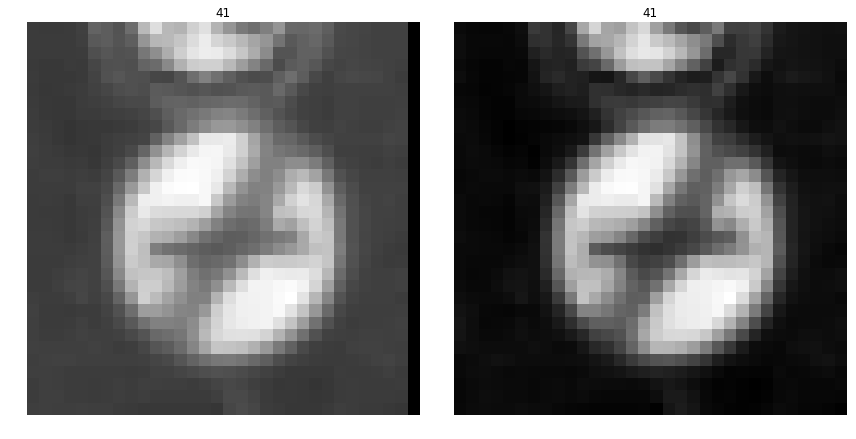

In [11]:
figures1 = {}
labels = {}
figures1[0] = X_train[n_train+1].squeeze()
labels[0] = y_train[n_train+1]
figures1[1] = X_train[0].squeeze()
labels[1] = y_train[0]

plot_figures(figures1, 1, 2, labels)

New Dataset Size : 89860


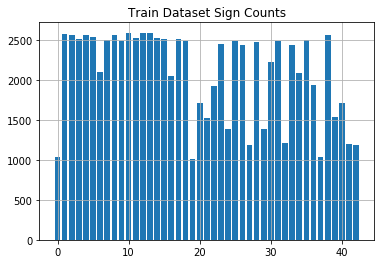

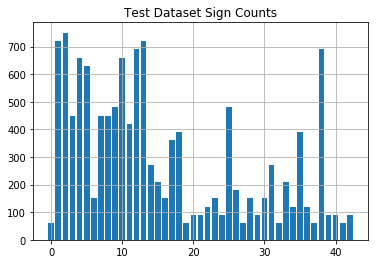

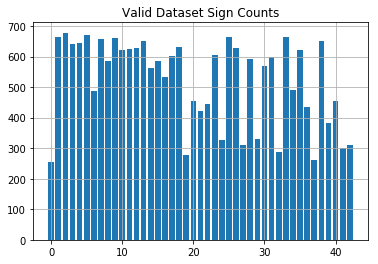

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("New Dataset Size : {}".format(X_train.shape[0]))

unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.grid()
plt.title("Train Dataset Sign Counts")
plt.show()

unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts)
plt.grid()
plt.title("Test Dataset Sign Counts")
plt.show()

unique, counts = np.unique(y_valid, return_counts=True)
plt.bar(unique, counts)
plt.grid()
plt.title("Valid Dataset Sign Counts")
plt.show()

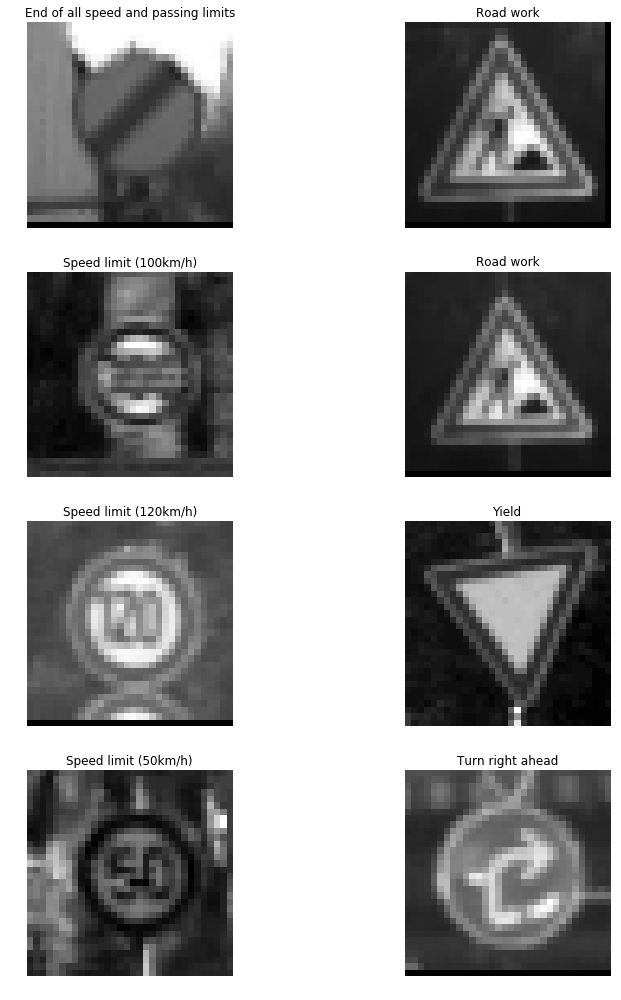

In [13]:
def normalize(im):
    return -np.log(1/((1 + im)/257) - 1)

# X_train_normalized = normalize(X_train)
# X_test_normalized = normalize(X_test)
X_train_normalized = X_train/127.5-1
X_test_normalized = X_test/127.5-1

number_to_stop = 8
figures = {}
count = 0
for i in random_signs:
    labels[count] = name_values[y_train[i]][1].decode('ascii')
    figures[count] = X_train_normalized[i].squeeze()
    count += 1;
    
plot_figures(figures, 4, 2, labels)

In [14]:
X_train = X_train_normalized
X_test = X_test_normalized

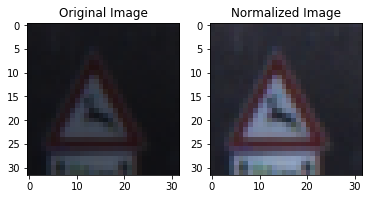

In [20]:
image_num=250
plt.subplot(121)
plt.imshow(X_train[image_num])
plt.title("Original Image")
plt.subplot(122)
plt.title("Normalized Image")
plt.imshow(train_features[image_num])
plt.show()

# Save Data

In [35]:
# import os

# # Save data
# pickle_file = 'trafficSigns.pickle'
# if not os.path.isfile(pickle_file):
#     print('Saving data to pickle file...')
#     try:
#         with open('trafficSigns.pickle', 'wb') as pfile:
#             pickle.dump(
#                 {
#                     'train_dataset': train_features2,
#                     'train_labels': train_labels2,
#                     'valid_dataset': valid_features,
#                     'valid_labels': valid_labels,
#                     'test_dataset': test_features,
#                     'test_labels': test_labels,
#                 },
#                 pfile, pickle.HIGHEST_PROTOCOL)
#     except Exception as e:
#         print('Unable to save data to', pickle_file, ':', e)
#         raise

# print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.


# Load Data

In [37]:
# %matplotlib inline

# # Load the modules
# import pickle
# import math

# import numpy as np
# import tensorflow as tf
# from tqdm import tqdm
# import matplotlib.pyplot as plt

# # Reload the data
# pickle_file = 'trafficSigns.pickle'
# with open(pickle_file, 'rb') as f:
#     pickle_data = pickle.load(f)
#     train_features = pickle_data['train_dataset']
#     train_labels = pickle_data['train_labels']
#     valid_features = pickle_data['valid_dataset']
#     valid_labels = pickle_data['valid_labels']
#     test_features = pickle_data['test_dataset']
#     test_labels = pickle_data['test_labels']
#     del pickle_data  # Free up memory

# print('Data and modules loaded.')
# print("train_features size:", train_features.shape)
# print("train_labels size:", train_labels.shape)
# print("valid_features size:", valid_features.shape)
# print("valid_labels size:", valid_labels.shape)
# print("test_features size:", test_features.shape)
# print("test_labels size:", test_labels.shape)

Data and modules loaded.
train_features size: (37277, 32, 32, 3)
train_labels size: (37277, 43)
valid_features size: (1962, 32, 32, 3)
valid_labels size: (1962, 43)
test_features size: (12630, 32, 32, 3)
test_labels size: (12630, 43)


In [38]:
# # number of training examples
# n_train = train_features.shape[0]

# # number of valid examples
# n_valid = valid_features.shape[0]

# # number of testing examples
# n_test = test_features.shape[0]

# # what's the shape of an image?
# image_shape = train_features[0].shape

# # how many classes are in the dataset
# n_classes = train_labels.shape[1]

# print("n_train:", n_train)
# print("n_valid:", n_valid)
# print("n_test:", n_test)
# print("image shape:", image_shape)
# print("n_classes:", n_classes)

n_train: 37277
n_valid: 1962
n_test: 12630
image shape: (32, 32, 3)
n_classes: 43


In [39]:
# ### Define your architecture here.
# ### Feel free to use as many code cells as needed.
# features_count = image_shape[0] * image_shape[1] * image_shape[2] # 32 x 32 x 3
# labels_count = len(train_labels[0])

# print("features count:", features_count)
# print("labels count:", labels_count)

features count: 3072
labels count: 43


In [40]:
# # Reformat the matrix
# def reformat(matrix):
#     return matrix.reshape((-1, features_count))

# train_features = reformat(train_features)
# valid_features = reformat(valid_features)
# test_features = reformat(test_features)

# # Print out shapes
# print(train_features.shape)
# print(valid_features.shape)
# print(test_features.shape)

(37277, 3072)
(1962, 3072)
(12630, 3072)


### Model Architecture

In [42]:
# ### Define your architecture here.
# ### Feel free to use as many code cells as needed.

# # parameters
# depth_conv1 = 32
# depth_conv2 = 64
# num_hidden = 128

# # Set the features and labels tensors
# x = tf.placeholder(tf.float32, shape=[None, features_count])
# y_ = tf.placeholder(tf.float32, shape=[None, labels_count])

# # Weight Initialization
# def weight_variable(shape):
#     initial = tf.truncated_normal(shape, stddev=0.1)
#     return tf.Variable(initial)

# def bias_variable(shape):
#     initial = tf.constant(0.1, shape=shape)
#     return tf.Variable(initial)

# # Convolutional and Pooling
# def conv2d(x, W):
#     return tf.nn.conv2d(x, W, strides=[1, 2, 2, 1], padding='SAME')

# def max_pool_2x2(x):
#     return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
#                         strides=[1, 2, 2, 1], padding='SAME')

# ### First Convolutional Layer
# W_conv1 = weight_variable([5, 5, image_shape[2], depth_conv1])
# b_conv1 = bias_variable([depth_conv1])

# x_image = tf.reshape(x, [-1,image_shape[0],image_shape[1],image_shape[2]])

# # Applying Relu function
# h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
# h_pool1 = max_pool_2x2(h_conv1)

# ### Densely Connected Layer
# reduced_size = image_shape[0]//4 * image_shape[1]//4* depth_conv1
# W_fc1 = weight_variable([reduced_size, num_hidden])
# b_fc1 = bias_variable([num_hidden])

# shape = h_pool1.get_shape().as_list()
# h_pool1_flat = tf.reshape(h_pool1, [-1, shape[1] * shape[2] * shape[3]])
# h_fc1 = tf.nn.relu(tf.matmul(h_pool1_flat, W_fc1) + b_fc1)

# ### Dropout
# keep_prob = tf.placeholder(tf.float32)
# h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# ### Readout Layer
# W_fc2 = weight_variable([num_hidden, labels_count])
# b_fc2 = bias_variable([labels_count])

# y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# # softmax function
# prediction = tf.nn.softmax(y_conv)

# # Loss and Cross entropy
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))

# # Determine if the predictions are correct
# is_correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))

# # Calculate the accuracy of the predictions
# accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

# # Feed dicts for training, validation, and test session
# train_feed_dict = {x: train_features, y_: train_labels, keep_prob: 1.0}
# valid_feed_dict = {x: valid_features, y_: valid_labels, keep_prob: 1.0}
# test_feed_dict = {x: test_features, y_: test_labels, keep_prob: 1.0}

# print("variables set.")

variables set.


In [17]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    print(x.shape)
    return tf.nn.relu(x)

def LeNet(x):
    mu = 0
    sigma = 0.1
    
    W_one = tf.Variable(tf.truncated_normal(shape=(5, 5, image_depth_channels, 6), mean = mu, stddev = sigma))
    b_one = tf.Variable(tf.zeros(6))
    layer_one = conv2d(x, W_one, b_one, 1)
    
    layer_one = tf.nn.max_pool(layer_one, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(layer_one.shape)
    print()
    
    W_two = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    b_two = tf.Variable(tf.zeros(16))
    layer_two = conv2d(layer_one, W_two, b_two, 1)

    layer_two = tf.nn.max_pool(layer_two, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(layer_two.shape)
    print()
    
    W_two_a = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 412), mean = mu, stddev = sigma))
    b_two_a = tf.Variable(tf.zeros(412))
    layer_two_a = conv2d(layer_two, W_two_a, b_two_a, 1)
    
    #layer_two_a = tf.nn.max_pool(layer_two_a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(layer_two_a.shape)
    print()    
    
    flat = flatten(layer_two_a)

    W_three = tf.Variable(tf.truncated_normal(shape=(412, 122), mean = mu, stddev = sigma))
    b_three = tf.Variable(tf.zeros(122))
    layer_three = tf.nn.relu(tf.nn.bias_add(tf.matmul(flat, W_three), b_three))
    layer_three = tf.nn.dropout(layer_three, keep_prob)
    
    W_four = tf.Variable(tf.truncated_normal(shape=(122, 84), mean = mu, stddev = sigma))
    b_four = tf.Variable(tf.zeros(84))
    layer_four = tf.nn.relu(tf.nn.bias_add(tf.matmul(layer_three, W_four), b_four))
    layer_four = tf.nn.dropout(layer_four, keep_prob)
    
    W_five = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    b_five = tf.Variable(tf.zeros(43))
    layer_five = tf.nn.bias_add(tf.matmul(layer_four, W_five), b_five)
    
    return layer_five

x = tf.placeholder(tf.float32, (None, 32, 32, image_depth_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Epoch 30/30: 100%|██████████| 622/622 [01:22<00:00,  7.56batches/s]


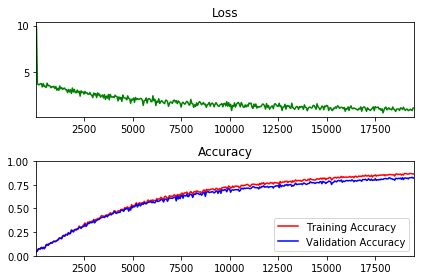

Validation accuracy at 0.8073394298553467


In [46]:
### Train your model here.
# Find the best parameters for each configuration
epochs = 30
batch_size = 60
learning_rate = 0.015

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    

# Create an operation that initializes all variables
init = tf.initialize_all_variables()

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 50
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]
            
            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, loss],
                feed_dict={x: batch_features, y_: batch_labels, keep_prob: 0.5})
            
            # Log every 50 batches
            if not batch_i % log_batch_step:
                # Calculate Training and Validation accuracy
                training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)

        # Check accuracy against Validation data
        validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

print('Validation accuracy at {}'.format(validation_accuracy))

### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [27]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
EPOCHS = 25
BATCH_SIZE = 156

rate = 0.0008

logits = LeNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

(?, 28, 28, 6)
(?, 14, 14, 6)

(?, 10, 10, 16)
(?, 5, 5, 16)

(?, 1, 1, 412)
(?, 1, 1, 412)



In [28]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    loss_log = []
    validation_accuracy_figure = []
    train_accuracy_figure = []
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, l = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        loss_log.append(l)    
        
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_figure.append(validation_accuracy)
        
        train_accuracy = evaluate(X_train, y_train)
        train_accuracy_figure.append(train_accuracy)
        print("EPOCH {} ...".format(i+1))
        print(" Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
 Accuracy = 0.894
Validation Accuracy = 0.814

EPOCH 2 ...
 Accuracy = 0.963
Validation Accuracy = 0.913

EPOCH 3 ...
 Accuracy = 0.979
Validation Accuracy = 0.944

EPOCH 4 ...
 Accuracy = 0.987
Validation Accuracy = 0.948

EPOCH 5 ...
 Accuracy = 0.991
Validation Accuracy = 0.963

EPOCH 6 ...
 Accuracy = 0.994
Validation Accuracy = 0.974

EPOCH 7 ...
 Accuracy = 0.995
Validation Accuracy = 0.974

EPOCH 8 ...
 Accuracy = 0.995
Validation Accuracy = 0.973

EPOCH 9 ...
 Accuracy = 0.998
Validation Accuracy = 0.982

EPOCH 10 ...
 Accuracy = 0.998
Validation Accuracy = 0.986

EPOCH 11 ...
 Accuracy = 0.998
Validation Accuracy = 0.983

EPOCH 12 ...
 Accuracy = 0.998
Validation Accuracy = 0.982

EPOCH 13 ...
 Accuracy = 0.999
Validation Accuracy = 0.984

EPOCH 14 ...
 Accuracy = 0.999
Validation Accuracy = 0.988

EPOCH 15 ...
 Accuracy = 0.999
Validation Accuracy = 0.989

EPOCH 16 ...
 Accuracy = 0.999
Validation Accuracy = 0.989

EPOCH 17 ...
 Accuracy = 0.999
Valid

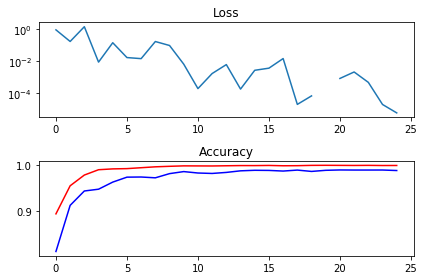

In [29]:
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.semilogy(loss_log)

acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(test_accuracy_figure, 'r', label='Training Accuracy')
acc_plot.plot(validation_accuracy_figure, 'b', label='Validation Accuracy')
# acc_plot.set_ylim([0, 1.0])
# acc_plot.set_xlim([batches[0], batches[-1]])
# acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

In [30]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))    
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Train Accuracy = 1.000
Valid Accuracy = 0.988
Test Accuracy = 0.934


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [32]:
cv2.resize?

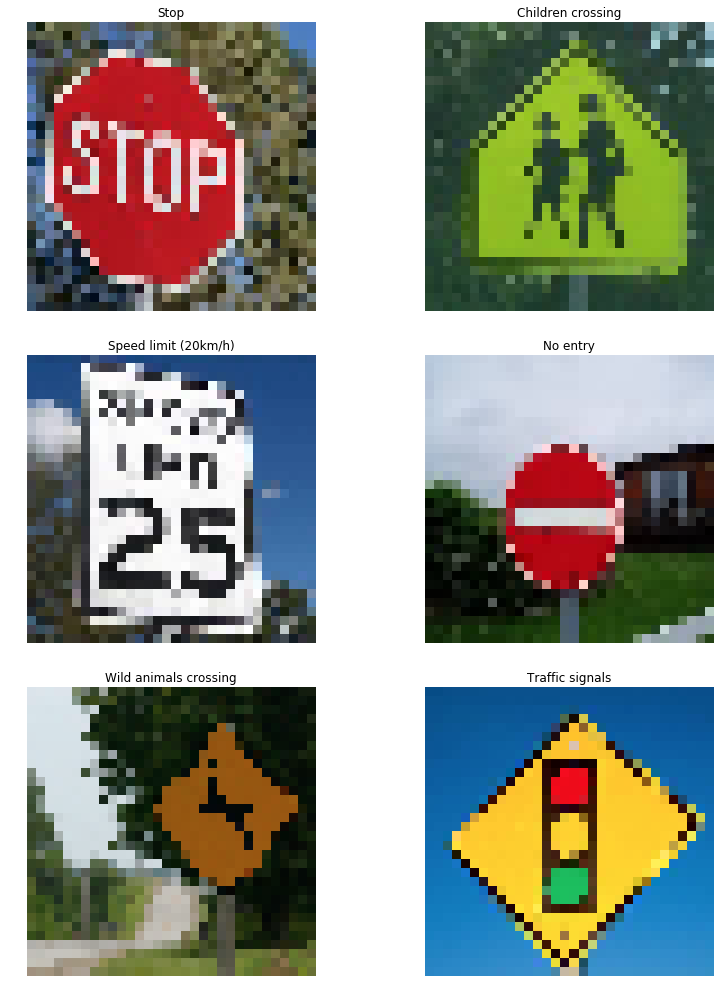

In [31]:
import glob
import cv2

my_images = sorted(glob.glob('./google-signs/*.png'))

my_labels = np.array([14, 28, 0, 17, 31, 26])
figures = {}
labels = {}
my_signs = []
index = 0
for index, my_image in enumerate(my_images):
    img = cv2.cvtColor(cv2.imread(my_image), cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32,32))
    figures[index] = img
    labels[index] = name_values[my_labels[index]][1].decode('ascii')
    my_signs.append(img)
    
plot_figures(figures, 3, 2, labels)

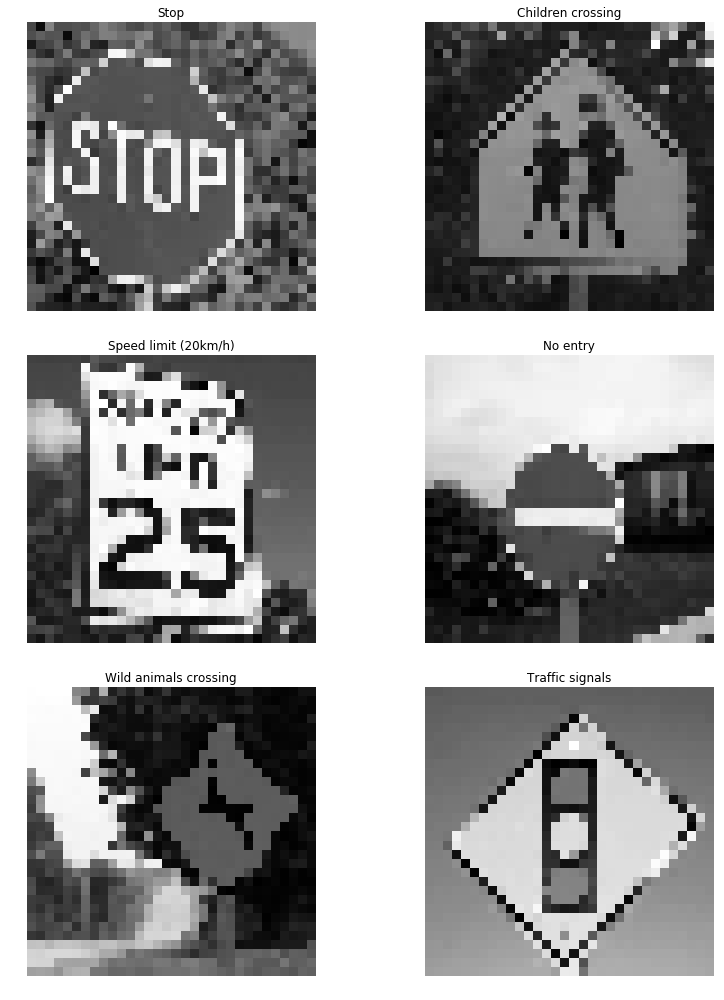

In [98]:
_my_signs = np.array(my_signs)
my_signs_gray = np.sum(_my_signs/3, axis=3, keepdims=True)
my_signs_normalized = my_signs_gray/127.5-1

# for sign in my_signs_normalized:
#     figures[i] = sign.squeeze()
#     plt.imshow(figures[i])
#     plt.show()
    
figures = {}
labels = {}
for i in range(6):
    labels[i] = name_values[my_labels[i]][1].decode('ascii')
    figures[i] = my_signs_gray[i].squeeze()
    
plot_figures(figures, 3, 2, labels)

In [87]:
name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')
for n in name_values:
    print(n)

(0, b'Speed limit (20km/h)')
(1, b'Speed limit (30km/h)')
(2, b'Speed limit (50km/h)')
(3, b'Speed limit (60km/h)')
(4, b'Speed limit (70km/h)')
(5, b'Speed limit (80km/h)')
(6, b'End of speed limit (80km/h)')
(7, b'Speed limit (100km/h)')
(8, b'Speed limit (120km/h)')
(9, b'No passing')
(10, b'No passing for vehicles over 3.5 metric tons')
(11, b'Right-of-way at the next intersection')
(12, b'Priority road')
(13, b'Yield')
(14, b'Stop')
(15, b'No vehicles')
(16, b'Vehicles over 3.5 metric tons prohibited')
(17, b'No entry')
(18, b'General caution')
(19, b'Dangerous curve to the left')
(20, b'Dangerous curve to the right')
(21, b'Double curve')
(22, b'Bumpy road')
(23, b'Slippery road')
(24, b'Road narrows on the right')
(25, b'Road work')
(26, b'Traffic signals')
(27, b'Pedestrians')
(28, b'Children crossing')
(29, b'Bicycles crossing')
(30, b'Beware of ice/snow')
(31, b'Wild animals crossing')
(32, b'End of all speed and passing limits')
(33, b'Turn right ahead')
(34, b'Turn left ahe

In [ ]:
# List the images from the saved directory
#img_files = os.listdir('./google_signs/')
my_images = sorted(glob.glob('./google-signs/*.png'))



test_images = np.zeros((1,32,32,2))

# Show each image
for i in img_files:
    image = './new_signs/' + i
    img = plt.imread(image)
    img = cv2.resize(img, (32,32))
    plt.imshow(img)
    plt.show()
    
    # Append to the test_images array
    test_images = np.append(test_images, [img[:,:,[0,2]]], axis=0)
    
# Remove the zero matrix at index 0
test_images = test_images[1:]

### Predict the Sign Type for Each Image

In [99]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
#     saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_accuracy = evaluate(my_signs_normalized, my_labels)
    print("My Data Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
My Data Set Accuracy = 0.167


### Analyze Performance

In [100]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

my_single_item_array = []
my_single_item_label_array = []

for i in range(6):
    my_single_item_array.append(my_signs_normalized[i])
    my_single_item_label_array.append(my_labels[i])

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
#         saver = tf.train.import_meta_graph('./lenet.meta')
        saver.restore(sess, "./lenet")
        my_accuracy = evaluate(my_single_item_array, my_single_item_label_array)
        print('Image {}'.format(i+1))
        print("Image Accuracy = {:.3f}".format(my_accuracy))
        print()

INFO:tensorflow:Restoring parameters from ./lenet
Image 1
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 2
Image Accuracy = 0.500

INFO:tensorflow:Restoring parameters from ./lenet
Image 3
Image Accuracy = 0.333

INFO:tensorflow:Restoring parameters from ./lenet
Image 4
Image Accuracy = 0.250

INFO:tensorflow:Restoring parameters from ./lenet
Image 5
Image Accuracy = 0.200

INFO:tensorflow:Restoring parameters from ./lenet
Image 6
Image Accuracy = 0.167



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


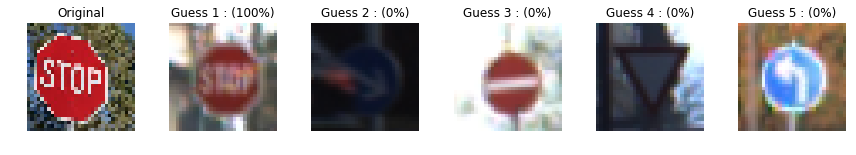

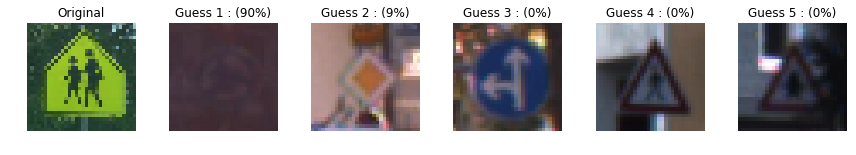

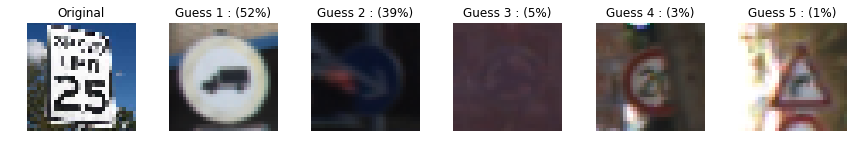

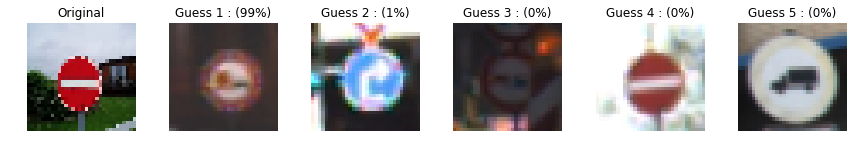

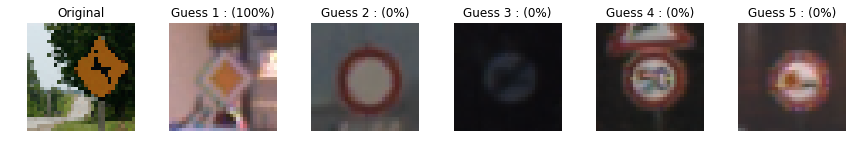

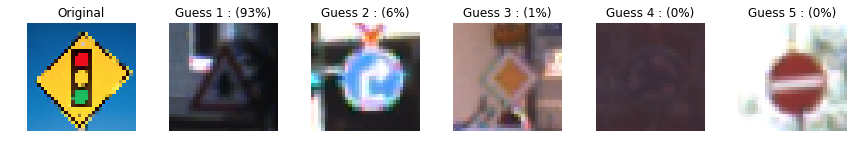

In [101]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
#     my_saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_signs_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_signs_normalized, keep_prob: 1.0})
#     print(my_top_k)

    for i in range(6):
        figures = {}
        labels = {}
        
        figures[0] = my_signs[i]
        labels[0] = "Original"
        
        for j in range(k_size):
#             print('Guess {} : ({:.0f}%)'.format(j+1, 100*my_top_k[0][i][j]))
            labels[j+1] = 'Guess {} : ({:.3f}%)'.format(j+1, 100*my_top_k[0][i][j])
            figures[j+1] = X_valid[np.argwhere(y_valid == my_top_k[1][i][j])[0]].squeeze()
            
#         print()
        plot_figures(figures, 1, 6, labels)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")